1. Import Library

In [2]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

2. Import Data

In [5]:
import os
# DataFrame
from google.colab import drive
drive.mount('/content/drive')

filename = 'data_diabetes.csv'
search_path = '/content/drive/My Drive'

# Search for the file
file_path = next((os.path.join(root, filename) for root, dirs, files in os.walk(search_path) if filename in files), None)

# Check if the file was found
if file_path:
    print(f"File found at: {file_path}")
    # Read the Excel file into a DataFrame
    df = pd.read_csv(file_path)
    print(df)
else:
    print(f"File '{filename}' not found in Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found at: /content/drive/My Drive/Colab Notebooks/Text_Clustering/data_diabetes.csv
                 NAMA DOKTER  \
0           dr. Vina Liliana   
1          dr ester agustina   
2           dr lidya hapsari   
3            dr vina liliana   
4          dr ramadhan harya   
5        dr lisza oktavianti   
6           dr ghifari zuhda   
7           dr putra anughra   
8    dr aisyah nur ramadhani   
9           tim dokter sehat   
10             dr farahdissa   
11        dr evelin kwandang   
12       dr adipasha dwitama   
13              dr farhdissa   
14          dr. Rahmita Dewi   
15                 dr. Lidya   
16    dr. Adhi Pasha Dwitama   
17              dr. Sylvia V   
18                  dr. Pany   
19  dr. Aisyah Nur Ramadhani   
20          dr. Vina Liliana   
21  dr. Aisyah Nur Ramadhani   
22                  dr. Pany   
23            

3. Filtering (StopWords)

In [8]:
stopwords_obj = StopWordRemoverFactory()
stopwords_sastrawi_ind = stopwords_obj.get_stop_words()
stopwords_nltk = stopwords.words('indonesian')

print(f'Jumlah Stop Words in Sastrawi Library {len(stopwords_sastrawi_ind)}')
print(f'Jumlah Stop Words in NLTK Library {len(stopwords_nltk)}')

set(stopwords_nltk)-set(stopwords_sastrawi_ind)

Jumlah Stop Words in Sastrawi Library 126
Jumlah Stop Words in NLTK Library 758


{'adanya',
 'adapun',
 'agaknya',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amatlah',
 'andalah',
 'antar',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagian',
 'bahkan',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut',
 'berikutnya',
 'berjumlah',
 'berkali-kali',
 'berkata',
 'berkehendak',
 'berkeinginan',
 'berkenaan',
 'berlainan',
 'berlalu',
 'berlangsung',
 'berlebihan',


In [10]:
stopwords_sastrawi_ind_plus = stopwords_sastrawi_ind + ["sebab","salah","satu",'rata', 'tahun', 'tengah', 'tinggi', 'umum', 'waktu']

idx = 0
data_copy_1 = df.copy()
for i in data_copy_1["TULISAN"]:
    cleanwords = []
    for t in word_tokenize(str(i).lower()):
        if t not in stopwords_sastrawi_ind_plus:
            cleanwords.append(t)

    stc = ""
    for word in cleanwords:
        stc += word + " "
    data_copy_1.iloc[idx,2] = stc
    idx = idx + 1


data_copy_1["TULISAN"]

0     diabetes penyakit kadar gula ditemukan berlebi...
1     diabetes merupakan penyakit tubuh memproduksi ...
2     nak memiliki orangtua diabetes , merasa takut ...
3     diabetes penyakit mana tubuh mengontrol kadar ...
4     impoten keadaan sulit mempertahankan memulai e...
5     diabetes biasa dikenal kencing manis , penyaki...
6     tubuh manusia memerlukan energi melakukan akti...
7     diabetes melitus ( dm ) suatu penyakit merupak...
8     diabetes merupakan penyakit banyak derita bany...
9     diabetes melitus suatu kelompok penyakit metab...
10    diabetes gula darah merupakan penyakit kronis ...
11    fenomena fajar penderita diabetes disebabkan a...
12    diabetes merupakan penyakit kronis gangguan or...
13    diabetes kondisi gula darah puasa melebihi bat...
14    diabetes suatu kondisi medis berkaitan hormon ...
15    penglihatan berbayang kabur membuat nyaman pen...
16    diabetes peningkatan kadar gula darah dipastik...
17    oats berasal biji gandum kering , mengandu

In [11]:
# stopwords_sastrawi_ind
stopwords_sastrawi_ind_plus
# stopwords.words('indonesian')

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

4. Stemming

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data_copy_2 = data_copy_1.copy()
idx = 0
for i in data_copy_2["TULISAN"]:
#     data_copy["TULISAN"] = stemmer.stem(data_copy["TULISAN"])
    data_copy_2.iloc[idx,2] = stemmer.stem(str(i))

    print(data_copy_2.iloc[idx,2])
    idx = idx + 1
    print()

diabetes sakit kadar gula temu lebih darah sering muncul keluh mudah lapar mudah haus gatal sering kencing turun berat badan ukur kadar gula darah laku periksa gula darah waktu periksa gula acak laku waktu perlu puasa gula darah puasa periksa laku puasa lama 8 jam gula darah 2 jam makan hba1c kadar gula sel darah merah tahu rata kadar gula darah 3 bulan akhir periksa jadi istilah diabetes waktu mungkin maksud kadar gula darah periksa gula darah waktu perihal keluh kepala kliyengan asa ringan mau jatuh tanda kadar gula terlalu rendah batas makan sangat ketat kontrol kadar gula perlu makan minum obat atur perlu laku cek kadar gula darah ulang lebih bila sedang jalan ibadah puasa tunjuk hasil dokter beri obat diabetes dosis tepat cukup atur pola makan

diabetes rupa sakit tubuh produksi insulin sebab tingkat kadar glukosa tubuh tipe diabetes diabetes tipe 1 akibat genetik muncul anak diabetes tipe 2 akibat gaya hidup muncul sejak dewasa gejala diabetes sendiri cepat haus lapar sering buan

5. Tokenizing

In [13]:
seq = 1
dataframess = pd.DataFrame({"Document":[]})
for i in data_copy_2["TULISAN"]:
    stc = re.sub(r"\d+", "", i) #menghapus angka
    stc = stc.translate(str.maketrans('','',string.punctuation)).lower() #menghapus tanda baca
    tokens = word_tokenize(stc) #tokenizing
#     print(tokens)
    kemunculan = FreqDist(tokens)
    data_final = pd.DataFrame(kemunculan.most_common())
    data_final_new = data_final.assign(Document = f'Document {seq}')
    seq = seq + 1
    dataframess = pd.concat([dataframess,data_final_new])
    print(tokens)
    print()
#     print(kemunculan.most_common())
#     print()

['diabetes', 'sakit', 'kadar', 'gula', 'temu', 'lebih', 'darah', 'sering', 'muncul', 'keluh', 'mudah', 'lapar', 'mudah', 'haus', 'gatal', 'sering', 'kencing', 'turun', 'berat', 'badan', 'ukur', 'kadar', 'gula', 'darah', 'laku', 'periksa', 'gula', 'darah', 'waktu', 'periksa', 'gula', 'acak', 'laku', 'waktu', 'perlu', 'puasa', 'gula', 'darah', 'puasa', 'periksa', 'laku', 'puasa', 'lama', 'jam', 'gula', 'darah', 'jam', 'makan', 'hbac', 'kadar', 'gula', 'sel', 'darah', 'merah', 'tahu', 'rata', 'kadar', 'gula', 'darah', 'bulan', 'akhir', 'periksa', 'jadi', 'istilah', 'diabetes', 'waktu', 'mungkin', 'maksud', 'kadar', 'gula', 'darah', 'periksa', 'gula', 'darah', 'waktu', 'perihal', 'keluh', 'kepala', 'kliyengan', 'asa', 'ringan', 'mau', 'jatuh', 'tanda', 'kadar', 'gula', 'terlalu', 'rendah', 'batas', 'makan', 'sangat', 'ketat', 'kontrol', 'kadar', 'gula', 'perlu', 'makan', 'minum', 'obat', 'atur', 'perlu', 'laku', 'cek', 'kadar', 'gula', 'darah', 'ulang', 'lebih', 'bila', 'sedang', 'jalan', 

6. Bag Of Words

In [14]:
dataframess.columns = ['Document', 'Word', 'Count']
# dataframess
data_final_summary = pd.pivot_table(dataframess, values='Count', index=['Document'],
                    columns=['Word'])
data_final_summary

Word,abortus,acak,acarbose,ada,adalahdiabetes,adang,adapun,agam,air,ajak,...,warna,waspada,wawancara,x,yaa,yang,yogurt,zaitun,zat,zink
Document,,,,,,,,,,,,,,,,,,,,,
Document 1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 12,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 15,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Document 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7. Filtering keyword

In [15]:
keyword = ["diabetes","sakit","gula","darah","obesitas","insulin","glukosa","obat","glikogen","makan","minum",
           "ginjal","hormon","saraf",
          "manis","melitus","kalori","pankreas", "dm"]
df_key = data_final_summary.loc[:, keyword]
df_key

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm
Document,,,,,,,,,,,,,,,,,,,
Document 1,3.0,1.0,13.0,10.0,NaN,NaN,NaN,2.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 10,5.0,5.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,8.0
Document 11,4.0,1.0,8.0,7.0,1.0,NaN,NaN,2.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 12,1.0,NaN,7.0,7.0,NaN,7.0,1.0,1.0,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Document 13,1.0,1.0,1.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN
Document 14,4.0,1.0,3.0,3.0,NaN,1.0,NaN,3.0,NaN,5.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Document 15,5.0,3.0,6.0,4.0,NaN,4.0,NaN,3.0,NaN,1.0,NaN,NaN,2.0,5.0,NaN,NaN,NaN,1.0,NaN
Document 16,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Document 17,3.0,3.0,10.0,15.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8. Data Preprocessing (Handling Missing Values)

In [16]:
df_key.fillna(0,inplace=True)
df_key

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm
Document,,,,,,,,,,,,,,,,,,,
Document 1,3.0,1.0,13.0,10.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 10,5.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,8.0
Document 11,4.0,1.0,8.0,7.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 12,1.0,0.0,7.0,7.0,0.0,7.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 13,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Document 14,4.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 15,5.0,3.0,6.0,4.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0
Document 16,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Document 17,3.0,3.0,10.0,15.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


9. Dimension Reduction

In [17]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df_key)
data_reduced = pd.DataFrame(data_reduced)
data_reduced

,0,1
0,10.668186,-0.058637
1,-3.649924,1.334201
2,5.099601,-0.556374
3,5.555805,-2.230782
4,-1.741026,-5.332285
5,-0.336571,-1.433480
6,1.844805,0.231123
7,-3.065620,-4.666626
8,12.205646,-0.153183
9,-2.168967,-4.176228


10. Clustering K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


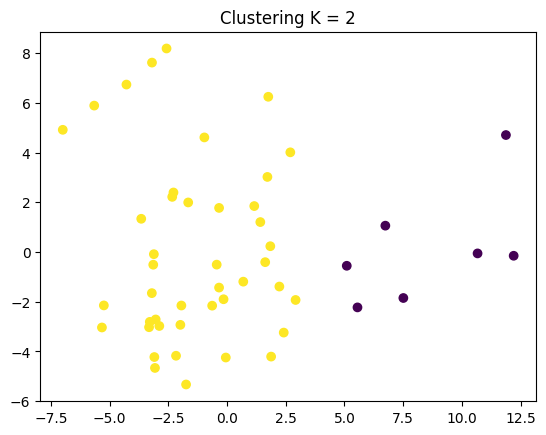

In [18]:
#try with k=2
y_pred_2 = KMeans(n_clusters=2,
               random_state=170).fit_predict(data_reduced)

plt.scatter(data_reduced.iloc[:,0],data_reduced.iloc[:,1],c=y_pred_2)
plt.title("Clustering K = 2")
plt.show()

In [19]:
data_k_2 = pd.DataFrame(data_reduced).copy()
data_k_2['cluster'] = y_pred_2
data_k_2.index = df_key.index
data_k_2

,0,1,cluster
Document,,,
Document 1,10.668186,-0.058637,0
Document 10,-3.649924,1.334201,1
Document 11,5.099601,-0.556374,0
Document 12,5.555805,-2.230782,0
Document 13,-1.741026,-5.332285,1
Document 14,-0.336571,-1.433480,1
Document 15,1.844805,0.231123,1
Document 16,-3.065620,-4.666626,1
Document 17,12.205646,-0.153183,0


11. Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

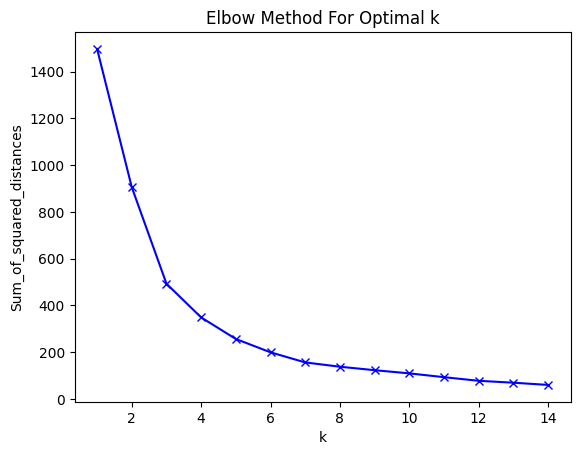

In [20]:
#trying to find the best number of clusters
Sum_of_squared_distances = []
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_reduced)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

12. Silhouette method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

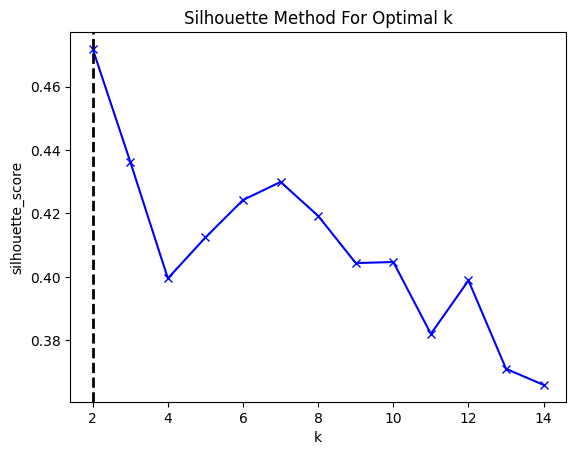

In [21]:
#trying to find the best number of clusters
sil_scr = []
K=range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit_predict(data_reduced)
    score = silhouette_score(data_reduced, km.labels_, metric='euclidean')
    sil_scr.append(score)

plt.plot(K, sil_scr, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.axvline(x=2,linewidth=2,color='black',linestyle='--')
plt.show()
# sil_scr

13. Clustering in K = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


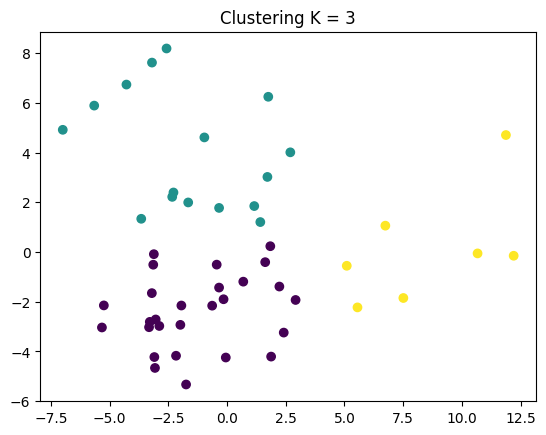

In [22]:
#try with k=3
y_pred_3 = KMeans(n_clusters=3,
               random_state=170).fit_predict(data_reduced)

plt.scatter(data_reduced.iloc[:,0],data_reduced.iloc[:,1],c=y_pred_3)
plt.title("Clustering K = 3")
plt.show()

In [23]:
data_k_3 = pd.DataFrame(data_reduced).copy()
data_k_3['cluster'] = y_pred_3
data_k_3.index = df_key.index
data_k_3

,0,1,cluster
Document,,,
Document 1,10.668186,-0.058637,2
Document 10,-3.649924,1.334201,1
Document 11,5.099601,-0.556374,2
Document 12,5.555805,-2.230782,2
Document 13,-1.741026,-5.332285,0
Document 14,-0.336571,-1.433480,0
Document 15,1.844805,0.231123,0
Document 16,-3.065620,-4.666626,0
Document 17,12.205646,-0.153183,2


14. Result

In [24]:
data_k_merge = pd.DataFrame(data_reduced).copy()
data_k_merge.drop([0,1],inplace=True,axis=1)
data_k_merge['cluster_2'] = y_pred_2
data_k_merge['cluster_3'] = y_pred_3
data_k_merge.index = df_key.index

print(f'Jumlah data seluruhnya adalah {len(data_k_merge)}')
print()
#K=2
#Cluster 0
print("Clustering K=2")
print(f'Jumlah dari cluster 0 adalah {len(data_k_merge[data_k_merge["cluster_2"]==0])}')
#Cluster 1
print(f'Jumlah dari cluster 1 adalah {len(data_k_merge[data_k_merge["cluster_2"]==1])}')
print()
#K=3
#Cluster 0
print("Clustering K=3")
print(f'Jumlah dari cluster 0 adalah {len(data_k_merge[data_k_merge["cluster_3"]==0])}')
#Cluster 1
print(f'Jumlah dari cluster 1 adalah {len(data_k_merge[data_k_merge["cluster_3"]==1])}')
#Cluster 2
print(f'Jumlah dari cluster 1 adalah {len(data_k_merge[data_k_merge["cluster_3"]==2])}')
data_k_merge

Jumlah data seluruhnya adalah 50

Clustering K=2
Jumlah dari cluster 0 adalah 7
Jumlah dari cluster 1 adalah 43

Clustering K=3
Jumlah dari cluster 0 adalah 27
Jumlah dari cluster 1 adalah 16
Jumlah dari cluster 1 adalah 7


,cluster_2,cluster_3
Document,,
Document 1,0,2
Document 10,1,1
Document 11,0,2
Document 12,0,2
Document 13,1,0
Document 14,1,0
Document 15,1,0
Document 16,1,0
Document 17,0,2


In [25]:
print("Jumlah data yang memiliki cluster berbeda antara cluster 2 dan 3 adalah ",((data_k_merge[data_k_merge['cluster_2']!=data_k_merge['cluster_3']]).shape)[0])
data_diff = data_k_merge[data_k_merge['cluster_2']!=data_k_merge['cluster_3']]

Jumlah data yang memiliki cluster berbeda antara cluster 2 dan 3 adalah  34


In [26]:
print("Jumlah data yang memiliki cluster sama antara cluster 2 dan 3 adalah ",((data_k_merge[data_k_merge['cluster_2']==data_k_merge['cluster_3']]).shape)[0])
data_k_merge[data_k_merge['cluster_2']==data_k_merge['cluster_3']]

Jumlah data yang memiliki cluster sama antara cluster 2 dan 3 adalah  16


,cluster_2,cluster_3
Document,,
Document 10,1,1
Document 19,1,1
Document 2,1,1
Document 20,1,1
Document 21,1,1
Document 22,1,1
Document 23,1,1
Document 29,1,1
Document 3,1,1
